**Project on Computer Vision - Plant Seedlings Image Classification using CNNs in Keras**

Submittted by Kingshuk Banerjee

Import the initial libraries to load the images dataset

In [1]:
import numpy as np                               
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow


Mount the google drive and load the image dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
images_path = '/content/drive/My Drive/Colab Notebooks/data/images.npy'

In [4]:
images = np.load(images_path)

Observe the shape of the data and visualize the images

In [5]:
images.shape

(4750, 128, 128, 3)

There are 4750 records with 128x128 pixels and 3 color channels RGB

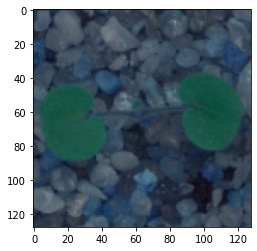

In [6]:
sample = images[0]
plt.imshow(sample)

Visualize a few more random images and select one as a sample

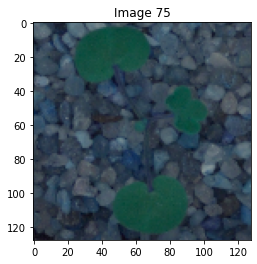

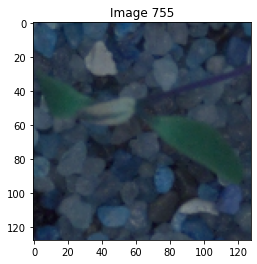

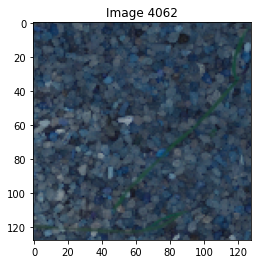

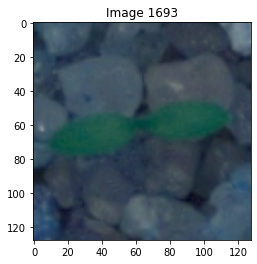

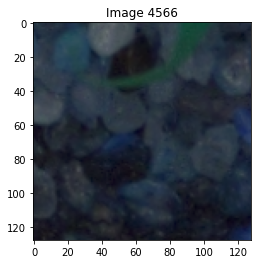

In [7]:
import random
for _ in range(5):
  i = random.randint(0, images.shape[0])
  sample = images[i]
  plt.title('Image ' + str(i))
  plt.imshow(sample)
  plt.show()

Use the CV2 library to display, resize, blur a selected image

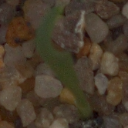

In [8]:
sample = images[random.randint(0, images.shape[0])]
cv2_imshow(sample)

Half sized:


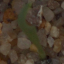

Double sized:


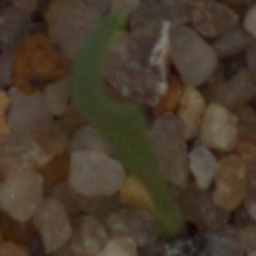

In [9]:
half = cv2.resize(sample, (int(sample.shape[0]/2), int(sample.shape[1]/2)))
print("Half sized:")
cv2_imshow(half)

double = cv2.resize(sample, (int(sample.shape[0]*2), int(sample.shape[1]*2)))
print ("Double sized:")
cv2_imshow(double)

Grayscale and blur the sample image

Original


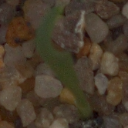

(128, 128, 3)
Grayscale


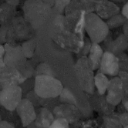

(128, 128)


In [10]:
gray = cv2.cvtColor(sample, cv2.COLOR_BGR2GRAY)
print("Original")
cv2_imshow(sample)
print(sample.shape)
print("Grayscale")
cv2_imshow(gray)
print(gray.shape)

blurred by (15, 15)


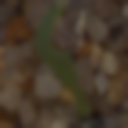

blurred by (3, 3)


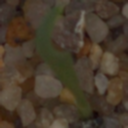

In [11]:
blurred = cv2.GaussianBlur(sample, (15, 15), 0)
print('blurred by (15, 15)')
cv2_imshow(blurred)
#print(blurred.shape)
blurred = cv2.GaussianBlur(sample, (3, 3), 0)
print('blurred by (3, 3)')
cv2_imshow(blurred)
#print(blurred.shape)

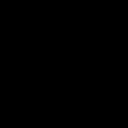

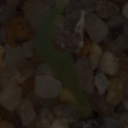

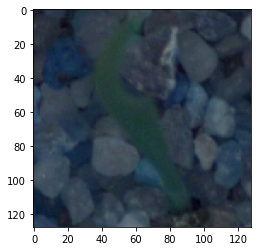

In [13]:
normalized = (sample * 1.0 / 255.0)
cv2_imshow(normalized)
#normalized
# increase pixel intensity for viewing.
cv2_imshow(normalized*128)
# as suggested by academic support, visualize using pyplot.imshow
plt.imshow(normalized)

Create 3 datasets - original, grayscale and blurred

Note that the original and blurred image shapes are already in the right shape for CNN in keras. For the grayscale, we will reshape the images to (128, 128, 1) to fit the keras requirement.

A random blurred image sample - shape=(128, 128, 3)


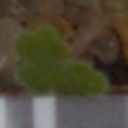

A random grayed image sample - shape=(128, 128, 1)


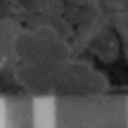

In [14]:
# Blur all the images
blurred_images = np.empty(shape=images.shape)
i = 0
for im in images:
  blurred = cv2.GaussianBlur(im, (5, 5), 0)
  blurred_images[i] = blurred
  i = i + 1

sample = blurred_images[330]
print('A random blurred image sample - shape={}'.format(sample.shape))
cv2_imshow(sample)

# Blur all the images
gray_images = np.empty(shape=(images.shape[0], images.shape[1], images.shape[2], 1))
i = 0
for im in images:
  gray_i = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
  gray_i = gray_i.reshape((images.shape[1], images.shape[2], 1))
  gray_images[i] = gray_i
  i = i + 1

sample = gray_images[330]
print('A random grayed image sample - shape={}'.format(sample.shape))
cv2_imshow(sample)

Now we are ready with 3 datasets to feed into the network. 
Handle the labels before train/test split. 

In [15]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical


In [16]:
labels_path = '/content/drive/My Drive/Colab Notebooks/data/Labels.csv'
labels = pd.read_csv(labels_path)
print(labels.nunique())
print(labels.value_counts())

Label    12
dtype: int64
Label                    
Loose Silky-bent             654
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Charlock                     390
Sugar beet                   385
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Maize                        221
Common wheat                 221
dtype: int64


In [17]:
labels_one_hot = pd.get_dummies(labels['Label'])
labels_one_hot

,Black-grass,Charlock,Cleavers,Common Chickweed,Common wheat,Fat Hen,Loose Silky-bent,Maize,Scentless Mayweed,Shepherds Purse,Small-flowered Cranesbill,Sugar beet
0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4745,0,0,0,0,0,0,1,0,0,0,0,0
4746,0,0,0,0,0,0,1,0,0,0,0,0
4747,0,0,0,0,0,0,1,0,0,0,0,0
4748,0,0,0,0,0,0,1,0,0,0,0,0


In [18]:
Y = labels_one_hot.values
print('shape of Y {}'.format(Y.shape))
print('One hot encoded first label {}'.format(Y[0]))

shape of Y (4750, 12)
One hot encoded first label [0 0 0 0 0 0 0 0 0 0 1 0]


Select a dataset - I have tried all 3 datasets, results are mentioned at the end.
Here for submission, I am selecting the blurred_images

In [19]:
image_data = blurred_images

Split the dataset into train, test and validation sets

In [20]:
X_train, X_t, Y_train, Y_t = train_test_split(image_data, Y, test_size=0.3, random_state=1)
X_train.shape, X_t.shape, Y_train.shape, Y_t.shape

((3325, 128, 128, 3), (1425, 128, 128, 3), (3325, 12), (1425, 12))

In [22]:
X_val, X_test, Y_val, Y_test = train_test_split(X_t, Y_t, test_size=0.5, random_state=1)
X_train.shape, X_test.shape, X_val.shape, Y_train.shape, Y_test.shape, Y_val.shape

((3325, 128, 128, 3),
 (713, 128, 128, 3),
 (712, 128, 128, 3),
 (3325, 12),
 (713, 12),
 (712, 12))

Normalize the pixel values of the image data

In [23]:
# Above data segments are already in good shape for keras.
# Here we will normalize the data
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
x_val = X_val.astype('float32')
X_train = X_train/255
X_test = X_test/255
X_val = X_val/255

Import the tensorflow keras libraries

In [24]:
from tensorflow.keras.models import Sequential          # Sequential groups a linear stack of layers into a tf.keras.Model.
from tensorflow.keras.layers import Conv2D              # This layer creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs.
from tensorflow.keras.layers import MaxPooling2D        # Max pooling operation for 2D spatial data.
from tensorflow.keras.layers import Flatten             # Flattens the input. Does not affect the batch size.
from tensorflow.keras.layers import Dense, Dropout      # Dropout: Applies Dropout to the input.
                                                        # Dense: Just your regular densely-connected NN layer.
from tensorflow.keras.callbacks import EarlyStopping

Build the CNN model

In [26]:
classifier = Sequential()
classifier.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(image_data.shape[1], image_data.shape[2], image_data.shape[3]), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Flatten())
classifier.add(Dense(512, activation='relu'))
classifier.add(Dropout(0.5))
#classifier.add(Dense(256, activation='relu'))
#classifier.add(Dropout(0.2))
classifier.add(Dense(128, activation='relu'))
classifier.add(Dropout(0.2))
classifier.add(Dense(12, activation='softmax'))
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 61, 61, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)             

In [27]:
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Train the model on the training set and provide the validation set as test. 
Using EarlyStopping to stop the training when val_loss does not improve for 10 iterations.

In [28]:
earlystop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = classifier.fit(X_train, Y_train, batch_size=64, epochs=150, validation_data=(X_val, Y_val), callbacks=[earlystop])

Epoch 1/150
52/52 [==============================] - 9s 37ms/step - loss: 2.3867 - accuracy: 0.1707 - val_loss: 1.8410 - val_accuracy: 0.3904
Epoch 2/150
52/52 [==============================] - 1s 25ms/step - loss: 1.7937 - accuracy: 0.3938 - val_loss: 1.5504 - val_accuracy: 0.4635
Epoch 3/150
52/52 [==============================] - 1s 25ms/step - loss: 1.5230 - accuracy: 0.4677 - val_loss: 1.3565 - val_accuracy: 0.5351
Epoch 4/150
52/52 [==============================] - 1s 25ms/step - loss: 1.3335 - accuracy: 0.5289 - val_loss: 1.2032 - val_accuracy: 0.5969
Epoch 5/150
52/52 [==============================] - 1s 25ms/step - loss: 1.1002 - accuracy: 0.6099 - val_loss: 1.0522 - val_accuracy: 0.6615
Epoch 6/150
52/52 [==============================] - 1s 25ms/step - loss: 0.9444 - accuracy: 0.6785 - val_loss: 1.0065 - val_accuracy: 0.6643
Epoch 7/150
52/52 [==============================] - 1s 26ms/step - loss: 0.8296 - accuracy: 0.7069 - val_loss: 1.0206 - val_accuracy: 0.6685
Epoch 

Plot the train and validation loss and accuracy curves

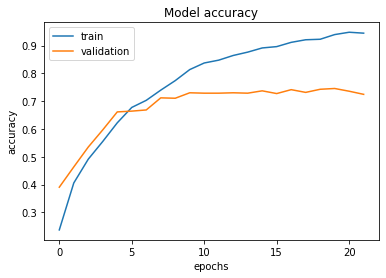

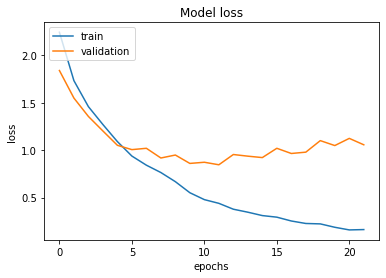

In [29]:
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

We see that the model quickly overfits the data.
Find the loss and accuracy on the test set

In [30]:
loss, acc = classifier.evaluate(X_test, Y_test)
loss, acc

23/23 [==============================] - 0s 8ms/step - loss: 0.6966 - accuracy: 0.7686


(0.6965733170509338, 0.7685834765434265)

Print the classification report and confusion matrix

In [33]:
from sklearn.metrics import classification_report, confusion_matrix

In [34]:
y_predictions = classifier.predict(X_test)
y_hat = list()
y_true = list()
for y in y_predictions:
  max = np.argmax(y)
  y_hat.append(max)
for y in Y_test:
  max = np.argmax(y)
  y_true.append(max)

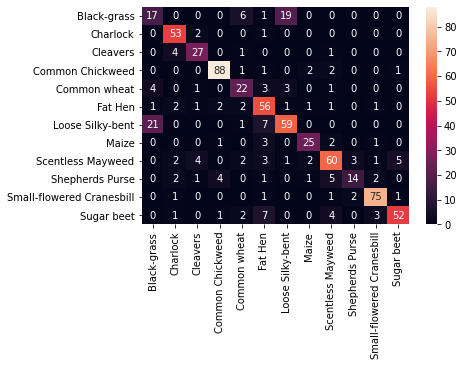

In [35]:
cm = confusion_matrix(y_true, y_hat)
df = pd.DataFrame(cm, index=list(labels_one_hot.columns), columns=list(labels_one_hot.columns))
sns.heatmap(df, annot=True, fmt='d')

Most misclassfications are in single digits except Black-grass and Loose Silky-bent, which seems to confuse the CNN.

No. of black grass indices in image data: 263
No. of loose silky bent indices in image data: 654
Black grass sample 1:


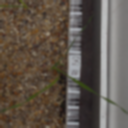

Loose Silky-bent sample 1:


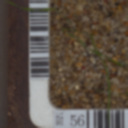

Black grass sample 2:


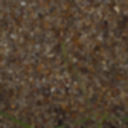

Loose Silky-bent sample 2:


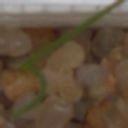

In [45]:
black_grass_indices = list(labels[labels['Label'] == 'Black-grass'].index)
loose_silky_bent_indices = list(labels[labels['Label'] == 'Loose Silky-bent'].index)
print("No. of black grass indices in image data: {}".format(len(black_grass_indices)))
print("No. of loose silky bent indices in image data: {}".format(len(loose_silky_bent_indices)))
print("Black grass sample 1:")
cv2_imshow(image_data[black_grass_indices[1]])
print('Loose Silky-bent sample 1:')
cv2_imshow(image_data[loose_silky_bent_indices[1]])
print("Black grass sample 2:")
cv2_imshow(image_data[black_grass_indices[5]])
print('Loose Silky-bent sample 2:')
cv2_imshow(image_data[loose_silky_bent_indices[5]])

We can see that the pictures are very similar.

In [34]:
print(classification_report(y_true, y_hat))

              precision    recall  f1-score   support

           0       0.41      0.16      0.23        43
           1       0.84      0.93      0.88        56
           2       0.68      0.85      0.76        33
           3       0.91      0.85      0.88        95
           4       0.63      0.65      0.64        34
           5       0.80      0.72      0.76        68
           6       0.64      0.86      0.73        88
           7       0.77      0.72      0.74        32
           8       0.77      0.76      0.76        83
           9       0.76      0.73      0.75        30
          10       0.86      0.94      0.90        81
          11       0.88      0.76      0.82        70

    accuracy                           0.77       713
   macro avg       0.75      0.74      0.74       713
weighted avg       0.77      0.77      0.76       713



We can see from the classification report that scores for Black-grass (class-0) are really low. It could be because the no. of samples of black-grass was much lesser than others, 1/3 compared to Loose-Silky-bent. 

Visualize predictions for few random samples

In [46]:
samples = [2, 3, 33, 36, 59, 105, 224, 1044, 2044, 3000, 4500, 4740]
label_names = list(labels_one_hot.columns)
#print(label_names)
actuals = labels['Label'].values
predictions = {'Sample Index': samples, 'Expected': [], 'Predicted': []}
for i in samples: 
  X = image_data[i]
  X = X.astype('float32')
  X = X / 255
  X = X.reshape((1, X.shape[0], X.shape[1], X.shape[2]))
  X.shape, X_test[0].shape
  y_pred = classifier.predict(X)
  y_pred = np.argmax(y_pred)
  predicted = label_names[y_pred]
  actual = actuals[i]
  predictions['Expected'].append(actual)
  predictions['Predicted'].append(predicted)
  
df = pd.DataFrame.from_dict(predictions)
df.set_index('Sample Index')
df

,Sample Index,Expected,Predicted
0,2,Small-flowered Cranesbill,Small-flowered Cranesbill
1,3,Small-flowered Cranesbill,Charlock
2,33,Small-flowered Cranesbill,Small-flowered Cranesbill
3,36,Small-flowered Cranesbill,Small-flowered Cranesbill
4,59,Small-flowered Cranesbill,Small-flowered Cranesbill
5,105,Small-flowered Cranesbill,Small-flowered Cranesbill
6,224,Small-flowered Cranesbill,Small-flowered Cranesbill
7,1044,Shepherds Purse,Common Chickweed
8,2044,Charlock,Charlock
9,3000,Scentless Mayweed,Scentless Mayweed


There are few misclassifications. 

The above classifier was also run through the blurred and grayscale datasets. 
The blurred dataset performed similar to original, however the grayscale dataset performed much worse (accuracy of 0.45 compared to 0.75 for blurred and original).